In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def check_metrics(true_val, pred_val):
    print("Accuracy: ", accuracy_score(true_val, pred_val))
    print("Roc_Auc: ", roc_auc_score(true_val, pred_val))
    print("Precision: ", precision_score(true_val, pred_val), " - процент правильно токсичных")
    print("Recall: ", recall_score(true_val, pred_val), " - процент выбранных токсичных")

data = pd.read_csv("toxic_train.csv")

test_data = pd.read_csv("toxic_test.csv")


train_texts = np.array(data['comment_text'])
for enum in range(train_texts.__len__()):
    train_texts[enum] = train_texts[enum].lower()
    train_texts[enum] = re.sub("[^0-9a-zA-Z']+", ' ', train_texts[enum])
    train_texts[enum] =  re.sub(' +', ' ', train_texts[enum])


    
test_texts = np.array(test_data['comment_text'])
for enum in range(test_texts.__len__()):
    test_texts[enum] = test_texts[enum].lower()
    test_texts[enum] = re.sub("[^0-9a-zA-Z']+", ' ', test_texts[enum])
    test_texts[enum] =  re.sub(' +', ' ', test_texts[enum])


train_target = np.array(data['is_toxic']).astype(int) * 2 - 1 
test_target = np.array(test_data['is_toxic']).astype(int) * 2 - 1

In [3]:
from optimization import GDClassifier, SGDClassifier

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
vect = CountVectorizer(min_df = 20)

In [6]:
train_matrix = vect.fit_transform(train_texts)

In [9]:
test_matrix = vect.transform(test_texts)

In [21]:
GD = GDClassifier(step_alpha = 3.5, step_beta = 0, l2_coef = 0)
SGD = SGDClassifier(batch_size = 8000, step_alpha = 3.4, step_beta = 0, l2_coef = 0)

In [11]:
holder_GD = GD.fit(train_matrix, train_target, trace=True)

In [22]:
holder_SGD = SGD.fit(train_matrix, train_target, trace=True)

In [13]:
res_GD = GD.predict(test_matrix)

In [23]:
res_SGD = SGD.predict(test_matrix)

In [15]:
accuracy_score(test_target, res_GD)

0.8804894563745406

In [20]:
accuracy_score(test_target, res_SGD)

0.8591603791835946

In [41]:
time_gd = np.cumsum(holder_GD['time'])[1:]

In [29]:
w_gd = holder_GD['w']

In [42]:
time_sgd = np.cumsum(holder_SGD['time'])[1:]

In [31]:
w_sgd = holder_SGD['weights']

In [36]:
 def predict(X, w):

    ans = np.sign(X * w)
    ans[ans == 0] = -1
    return ans

In [45]:
res_gd = [predict(test_matrix, w) for w in w_gd[1:]]

In [39]:
res_sgd = [predict(test_matrix, w) for w in w_sgd[1:]]

In [46]:
acc_gd = [accuracy_score(test_target, res) for res in res_gd]

In [47]:
acc_sgd = [accuracy_score(test_target, res) for res in res_sgd]

In [51]:
holder_SGD['epoch_num'][1:]

[0.9219953516067692,
 1.997656595148,
 3.073317838689231,
 4.148979082230461,
 5.224640325771692,
 6.300301569312923,
 7.375962812854154,
 8.451624056395383,
 9.527285299936608,
 10.602946543477833,
 11.678607787019057,
 12.754269030560282,
 13.829930274101507,
 14.905591517642732,
 15.981252761183956,
 17.056914004725193,
 18.13257524826643,
 19.208236491807668,
 20.283897735348905,
 21.359558978890142,
 22.43522022243138,
 23.510881465972616,
 24.586542709513854,
 25.66220395305509,
 26.737865196596328,
 27.813526440137565,
 28.889187683678802,
 29.96484892722004,
 31.040510170761276,
 32.116171414302514,
 33.191832657843726,
 34.26749390138494,
 35.34315514492615,
 36.41881638846736,
 37.494477632008575,
 38.57013887554979,
 39.645800119091,
 40.72146136263221,
 41.797122606173424,
 42.87278384971464,
 43.94844509325585,
 45.02410633679706,
 46.09976758033827,
 47.175428823879486,
 48.2510900674207,
 49.32675131096191,
 50.40241255450312,
 51.478073798044335,
 52.55373504158555,
 53

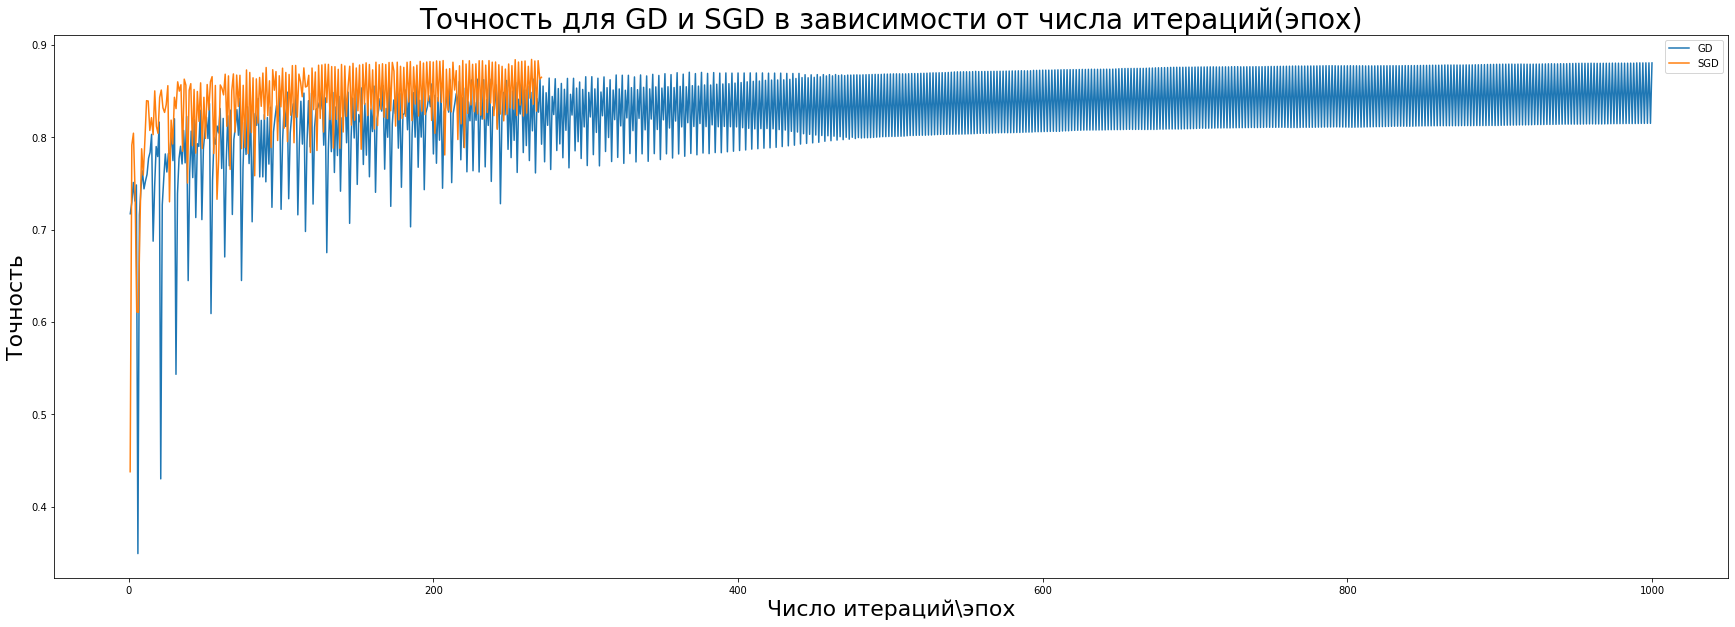

In [65]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1, 1001), acc_gd, label = "GD")
plt.plot(holder_SGD['epoch_num'][1:], acc_sgd, label = "SGD")
plt.title("Точность для GD и SGD в зависимости от числа итераций(эпох)", fontsize = 28)
plt.legend()
plt.xlabel("Число итераций\эпох", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/GD_SGD_comparison.png")

plt.show()

In [60]:
max(acc_sgd), np.argmax(acc_sgd)

(0.8843103114722384, 245)

In [66]:
max(acc_gd), np.argmax(acc_gd)

(0.880586186883343, 991)

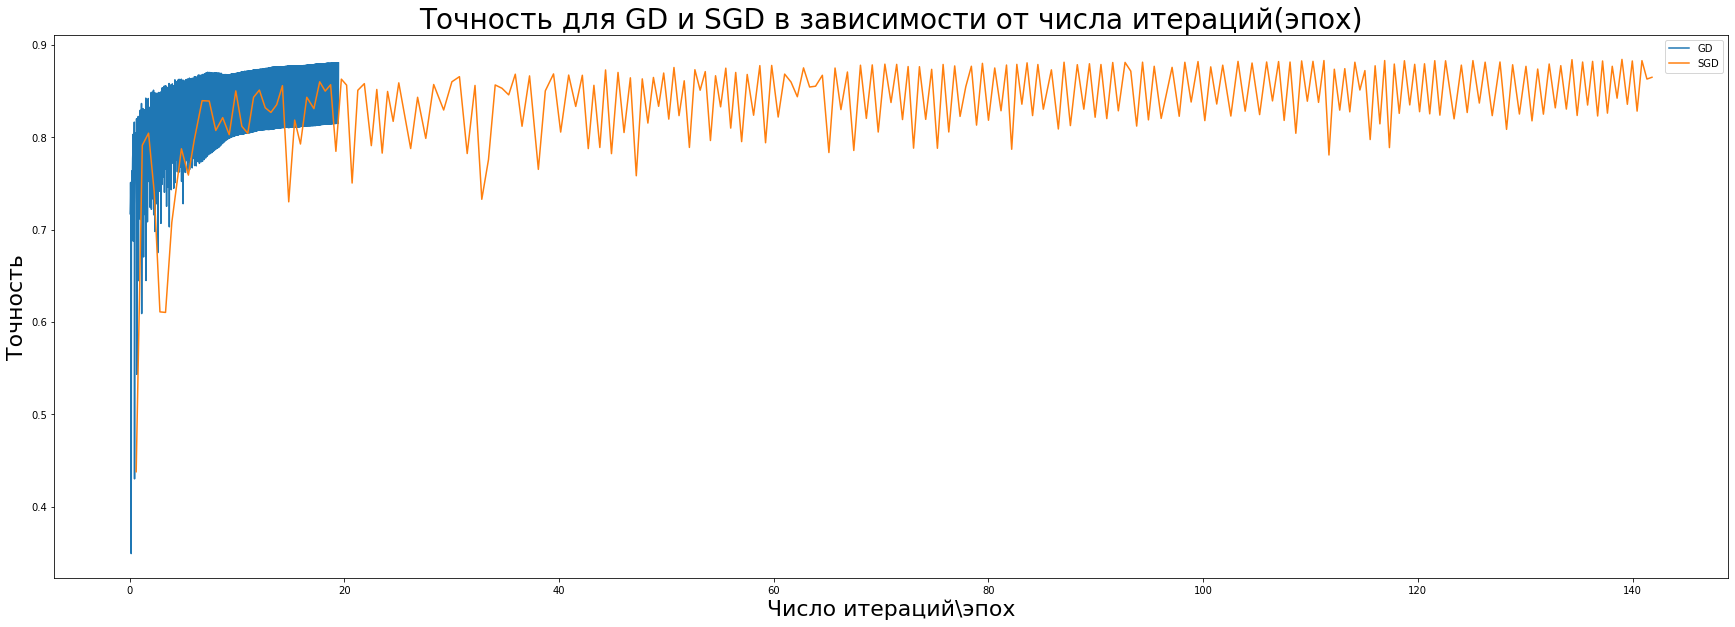

In [69]:
fig = plt.figure(figsize=[30, 10])

plt.plot(time_gd, acc_gd, label = "GD")
plt.plot(time_sgd, acc_sgd, label = "SGD")
plt.title("Точность для GD и SGD в зависимости от числа итераций(эпох)", fontsize = 28)
plt.legend()
plt.xlabel("Число итераций\эпох", fontsize=22)
plt.ylabel("Точность", fontsize=22)

plt.savefig("Images/GD_SGD_comparison_time.png")

plt.show()